<a href="https://colab.research.google.com/github/Ljut/PSAI-DSAI-datasets/blob/in-progress/VIS25_TIM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zadaća 1 – Primijenjena vjerovatnoća i statistika

Tim 1:
**Adnan Muradbegović, Aid Mustafić, Tarik Redžić, Zlatan Ljutika**


---









### Figure 1. Ilustrativni prikaz posvećenosti Tima 1 zadatku






<center><img src="https://i.imgur.com/Fur5grf.jpeg" alt="drawing" width="50%"/></center>



## 1. Uvod u rad; Opis problema i podataka

---



U ovom projektu, analiziramo podatke iz dataseta
[***Freelancer Earnings and Job Trends.***](https://www.kaggle.com/datasets/shohinurpervezshohan/freelancer-earnings-and-job-trends/), koji sadrži *podatke o poslovanju nasumično izabranih freelancera na 5 najpopularnijih platformi.*

**Period prikupljanja podataka:** *14. januar - 29. decembar 2024.*

Konkretno, motiv i cilj ove analize je **izvršiti istraživanje stanja i potreba freelance tržišta u prethodnoj godini,** na osnovu kojeg nastojimo ustanoviti i **iznijeti korisne zaključke za studente koji vrše prve korake u freelancing-u.**


---



Prije početka rada, **nužno je pokrenuti naredni blok koda** , koji učitava potrebne biblioteke i inicijalizira dataset za rad.


In [ ]:
!rm -rf PSAI-DSAI-datasets
!git clone -b in-progress https://github.com/Ljut/PSAI-DSAI-datasets

import pandas as pd ## Za manipulisanje golih podataka, (CSV, DataFrame,...)
import matplotlib.pyplot as plt ## Za vizualizaciju podataka
import numpy as np ## Za izvršavanje matematičkih operacija nad podacima
from IPython.display import HTML
import seaborn as sns

df = pd.read_csv('./PSAI-DSAI-datasets/freelancer_earnings_bd.csv')

Cloning into 'PSAI-DSAI-datasets'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 98 (delta 48), reused 50 (delta 22), pack-reused 0 (from 0)
Receiving objects: 100% (98/98), 3.46 MiB | 7.96 MiB/s, done.
Resolving deltas: 100% (48/48), done.


## **Opis analiziranog dataseta:**

Osnovne informacija o datasetu i podacima koje sadrži.

---

Dataset sadržava podatke o zaradi i poslovanju freelancera sa portala *Toptal, Fiverr, PeoplePerHour, Upwork* i *Freelancer.*

* **Broj obrađenih slučajeva** (redova): 1950
* **Broj posmatranih parametara** (kolona): 14 *( + jedinstveni ID freelancera )*



 * **Kategorični podaci:**

  1.   *Job_Category:* **Tip usluge, svrstano u 8 posmatranih kategorija.**
  2.    *Platform:* **Portal na kojem se izvršila usluga. 5 posmatranih kategorija**
  3.  *Experience_Level:* (Subjektivna, objektivna...?) **Procjena iskustva freelancera, svrstano u *Expert, Intermediate* i *Beginner***
  4.  *Region:* **Lokacija freelancera. Svrstano u 7 regija**
  5.   *Payment_Method:* **Način isplate**
  6.  *Project_Type:* **Način poslovanja, po fiksnoj stopi ili satnici.**



  


In [ ]:
#@title ####**Tabela 1:** *Kategorički podaci dataseta* { display-mode: "form" }
desc_categorical = df[['Job_Category','Platform','Experience_Level','Region','Payment_Method','Project_Type']].describe().T

desc_categorical['most_common'] = desc_categorical['top'] + ': '+desc_categorical['freq'].astype(str)+'/'+desc_categorical['count'].astype(str)

desc_categorical.drop('count',axis=1,inplace=True); ## Drop podrazumijevano pravi kopiju, inplace djeljuje na pozvani objekt
desc_categorical.drop('top',axis=1,inplace=True);
desc_categorical.drop('freq',axis=1,inplace=True);

desc_categorical['categories'] = df.apply(lambda x: ', '.join(map(str,x.unique()))) ## Output u index "categories": Kategorija1, Kategorija2,..

html = f"""
<div style="margin-top: 20px;display:flex;flex-direction:column;justify-content:center">
  {desc_categorical.to_html(index=False)}
  <p style="text-align: center; font-style: bold; margin-bottom: 10px;">
    Tabela 1: Kategorični podaci dataseta
  </p>
</div>
"""
display(HTML(html))

unique,most_common,categories
8,Graphic Design: 265/1950,"Web Development, App Development, Data Entry, Digital Marketing, Customer Support, Content Writing, Graphic Design, SEO"
5,Upwork: 420/1950,"Fiverr, PeoplePerHour, Upwork, Toptal, Freelancer"
3,Beginner: 668/1950,"Beginner, Intermediate, Expert"
7,Australia: 298/1950,"Asia, Australia, UK, Europe, USA, Middle East, Canada"
4,Crypto: 514/1950,"Mobile Banking, Crypto, Bank Transfer, PayPal"
2,Fixed: 997/1950,"Fixed, Hourly"




---


### **Kvantitativni podaci:**
7.    *Earnings_USD*: **Ukupna zarada u USD** *(Američki dolari)*
8.   *Hourly_Rate:* **Satnica freelancera u USD**  *(Američki dolari)*
9. *Job_Success_Rate:* **Postotak uspješno izvršenih usluga. Kriterij posmatranja:** [50%,100%]
10. *Job_Duration_Days:* **Prosječna dužina projekta, u danima**
11.  *Job_Completed:* **Broj uspješno izvršenih usluga**
12. *Client_Rating:* **Prosječna ocjena freelancera od klijenata,** [1.0-5.0]
13.   *Rehire_Rate:* **Postotak klijenata koji odluče ponovno koristiti usluge freelancera**
14. *Marketing_Spend:* **Ukupno uloženo u reklamiranje usluga**




   


In [ ]:
#@title ####**Tabela 2:** *Kvantitativni podaci dataseta* { display-mode: "form" }
desc_quantitative = df[['Earnings_USD','Hourly_Rate','Job_Success_Rate','Client_Rating','Rehire_Rate','Marketing_Spend']].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).T


desc_quantitative.drop('count',axis=1,inplace=True); ## Drop podrazumijevano pravi kopiju, inplace djeljuje na pozvani objekt
desc_quantitative.drop('std',axis=1,inplace=True)
desc_quantitative.rename(columns={'10%':'10thPercentile','25%':'1stQuartile','75%':'3rdQuartile','90%':'90thPercentile','50%': 'median'},inplace=True)
pd.set_option('display.max_colwidth',None) ## Globalno pravilo, nije prikazivalo sve kategorije u tabelu


html = f"""
<hr>
<div style="margin-top: 20px;display:flex;flex-direction:row;justify-content:center">

  {round(desc_quantitative,2).to_html(index=True)}

  <div style="margin:5%">
  <h3>Napomena:</h3>
<p>Ovdje zapažamo da srednja vrijednost i medijana podataka su vrlo slične. <br>Ovo je naznaka da su podaci <em>ravnomjerno/simetrično raspoređeni</em> oko njihove srednje vrijednosti.</p>
</div>
</div>
<h3 style="text-align: center; font-style: bold; margin-bottom: 10px;">
    Tabela 2: Kvantitativni podaci dataseta
  </h3>
"""
display(HTML(html))


,mean,min,10thPercentile,1stQuartile,median,3rdQuartile,90thPercentile,max
Earnings_USD,5017.57,51.00,965.00,2419.00,5048.00,7608.25,9057.60,9991.00
Hourly_Rate,52.58,5.02,15.87,30.05,52.28,75.12,90.56,99.83
Job_Success_Rate,74.95,50.16,54.66,61.92,75.40,87.54,94.90,99.99
Client_Rating,4.00,3.00,3.19,3.51,3.99,4.50,4.78,5.00
Rehire_Rate,44.56,10.00,16.86,27.15,43.92,61.69,73.04,79.95
Marketing_Spend,248.52,0.00,40.00,119.00,252.50,379.00,452.00,499.00


In [ ]:
#@title ####**Tabela 3:** *Primjerak; Prvi deset zapisa podataka u datasetu* { display-mode: "form" }
html = f"""
<hr>
<div style="margin-top: 20px;display: flex; justify-content: center;flex-direction:column">

  {df.head(10).to_html(index=False)}
  <h3 style="text-align: center; font-style: bold; margin-bottom: 10px;">
    Tabela 3: Prvih deset zapisa podataka u datasetu
  </h3>

</div>
<hr>
"""

display(HTML(html))

Freelancer_ID,Job_Category,Platform,Experience_Level,Region,Payment_Method,Job_Completed,Earnings_USD,Hourly_Rate,Job_Success_Rate,Client_Rating,Job_Duration_Days,Project_Type,Rehire_Rate,Marketing_Spend
1,Web Development,Fiverr,Beginner,Asia,Mobile Banking,180,1620,95.79,68.73,3.18,1,Fixed,40.19,53
2,App Development,Fiverr,Beginner,Australia,Mobile Banking,218,9078,86.38,97.54,3.44,54,Fixed,36.53,486
3,Web Development,Fiverr,Beginner,UK,Crypto,27,3455,85.17,86.60,4.20,46,Hourly,74.05,489
4,Data Entry,PeoplePerHour,Intermediate,Asia,Bank Transfer,17,5577,14.37,79.93,4.47,41,Hourly,27.58,67
5,Digital Marketing,Upwork,Expert,Asia,Crypto,245,5898,99.37,57.80,5.00,41,Hourly,69.09,489
6,Customer Support,Toptal,Beginner,Europe,Crypto,280,6867,43.04,57.80,4.87,8,Fixed,43.88,290
7,Web Development,Fiverr,Beginner,USA,Crypto,96,1677,20.50,52.90,4.29,32,Hourly,45.99,343
8,Data Entry,Toptal,Beginner,Australia,Bank Transfer,112,6193,82.15,93.31,3.84,30,Fixed,31.59,168
9,Content Writing,Toptal,Intermediate,USA,Crypto,233,8446,26.44,80.06,4.27,46,Fixed,50.11,396
10,Data Entry,PeoplePerHour,Beginner,Middle East,Mobile Banking,156,6608,54.99,85.40,4.57,52,Hourly,32.76,160



### **Deskriptivna analiza; Osnovni podaci**

Neke osnovne vizualizacije. Služe za bolje razumijevanje podataka u datasetu.

---

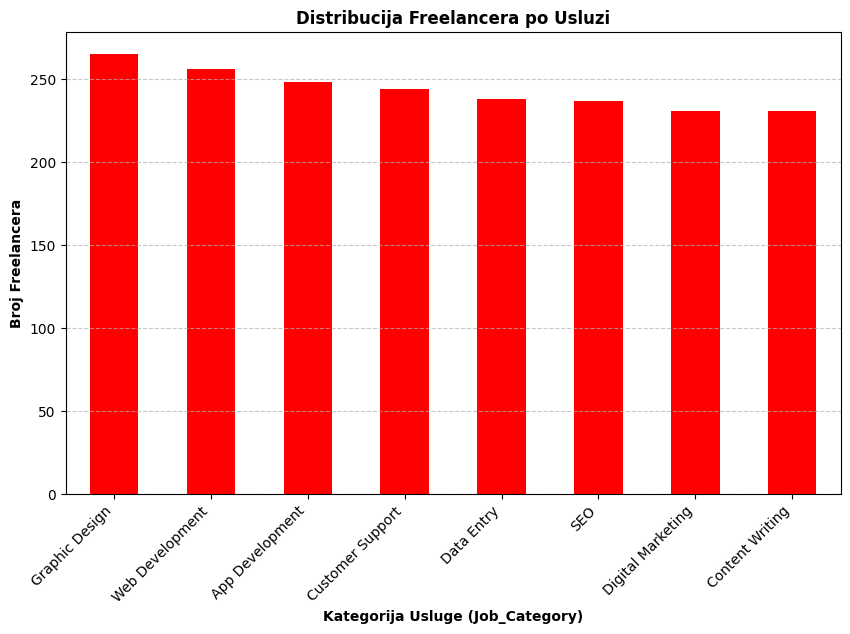

In [ ]:
#@title ####**Figura 2:** *Bar-plot vizualizacija distribucije freelancera po tipu usluge* { display-mode: "form" }

plt.figure(figsize=(10,6))
df['Job_Category'].value_counts().plot(kind='bar',color='red')
plt.title('Distribucija Freelancera po Usluzi',fontweight='bold')
plt.xlabel("Kategorija Usluge (Job_Category)",fontweight='bold')
plt.ylabel("Broj Freelancera",fontweight="bold")
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)


**Zaključak posmatranja:** Čak i ako pretpostavimo da podaci dataseta nisu stratificirano izabrani po posmatranom parametru i naizgled, na Figuri 2 **postoji razlika** između zastupljenosti različitih usluga na tržištu *(Grafički dizajn, Web Development kao najzastupljeniji, a Digital Marketing i Content Writing kao najmanje zastupljene usluge)*, **nedovoljno je za generalan i konkretan zaključak, 10% +/- 1%**.

Potrebno je daljnje ispitivanje.

Text(0.5, 1.0, 'Ukupno poslovanje po regiji')

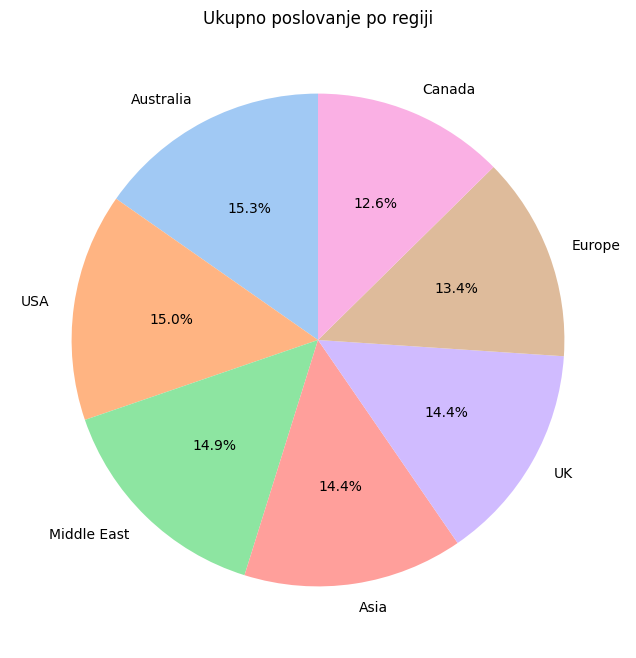

In [ ]:
#@title ####**Figura 3:** *Pie-chart vizualizacija poslovanja po regijama* { display-mode: "form" }


plt.figure(figsize=(8,8))
df['Region'].value_counts().plot(
    kind='pie',autopct='%1.1f%%',startangle=90,colors=sns.color_palette('pastel')
)
plt.ylabel('')
plt.title('Ukupno poslovanje po regiji')


**Zaključak posmatranja:** Sa Figure 3, dobijamo već veći dojam da se radi o **stratificirano** izabranim podacima, te da vjerovatno nećemo nikakve konkretne zaključke moći iznijeti pri globalnoj analizi hipoteza.

Pri analizama, potrebno će biti razmotriti da li postoji konkretniji zaključci pri sužavanju populacije.

Text(0.5, 1.0, 'Globalna distribucija zarade freelancera')

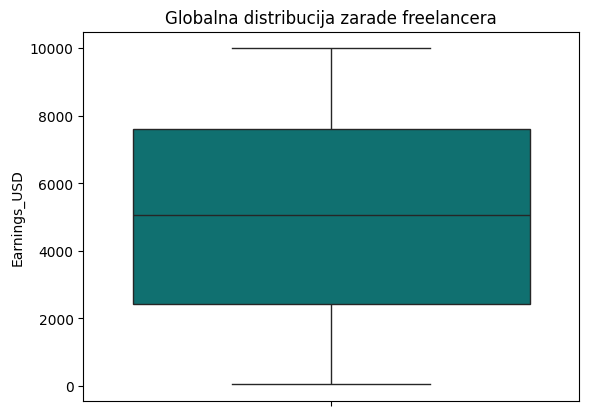

In [ ]:
#@title ####**Figure 4, 5, 6 i 7** *Box-plot vizulizacija raspodjele zarade freelancera* { display-mode: "form" }
sns.boxplot(data=df, y='Earnings_USD',color="teal")
plt.title("Figura 4: Globalna distribucija zarade freelancera")

Očekivano, zaista ništa konkretno ne dobijamo iz posmatranja ove raspodjele, stoga smo prinuđeni posmatrati suženije populacije.

<hr>

C:\Program Files\KMSpico\temp\ipykernel_1924\2420875247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=boxplot, y='Zarada ($USD)',x='Tip Usluge',palette="Set1")


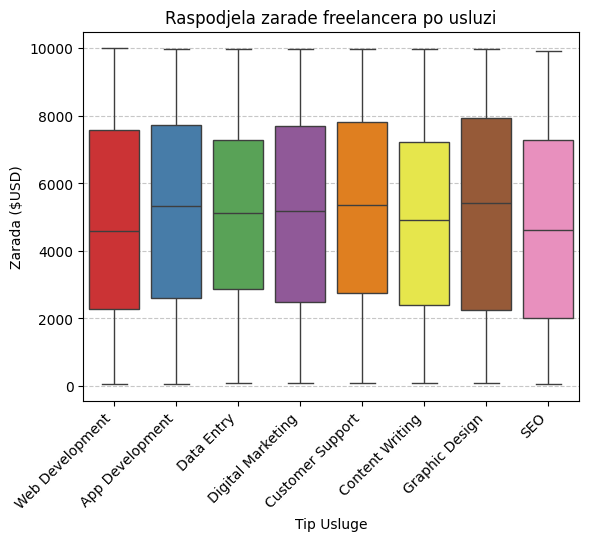

In [ ]:
boxplot = df.rename(columns={'Region':'Regija', "Earnings_USD":"Zarada ($USD)","Job_Category":"Tip Usluge"})
sns.boxplot(data=boxplot, y='Zarada ($USD)',x='Tip Usluge',palette="Set1")
plt.title("Figura 5: Raspodjela zarade freelancera po usluzi")
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()


**Zaključak posmatranja:**

Figura 5, po sličnosti maksimalne zarade među uslugama, sugeriše da **sposoban freelancer može ostvariti značajan prihod, bez obzira na tip usluge.**

Međutim, ogromne varijacije zarade, *opisane širokim IQR-ovima,* ukazuju na **potrebu dodatnog ispitivanja ostalih parametara u datasetu i njihov utjecaj na uspjeh i prihod freelancera.**

<hr>

C:\Program Files\KMSpico\temp\ipykernel_1924\785319155.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=boxplot, y='Zarada ($USD)',x='Regija',palette="Set2")


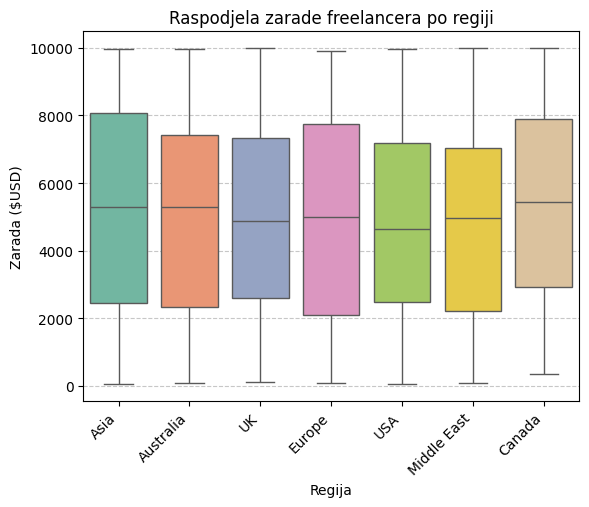

In [ ]:
sns.boxplot(data=boxplot, y='Zarada ($USD)',x='Regija',palette="Set2")
plt.title("Figura 6: Raspodjela zarade freelancera po regiji")
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()


**Zaključak posmatranja:**

Shodno Figuri 5, sličnosti maksimalne zarade po regijama, sugeriše da **sposoban freelancer može ostvariti značajan prihod, neovisno ni od regije u kojoj posluje.**
No, ovdje primjećujemo malo značajnije promjene u minimalnoj zaradi po regiji, te izraženije razlike IQR i medijana zarade.
Ogromne varijacije i daje posustaju, te ponovo potvrđuje se potreba za dodatnim ispitivanjem, no Figura 6 sugeriše da distribucija zarade u Aziji i Kanadi su pozitivinije za freelancere. *(Viši medijan zarade, najviši 75. percentili)*

<hr>

C:\Program Files\KMSpico\temp\ipykernel_1924\835856089.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g= sns.catplot(data=boxplot, x="Tip Usluge", y="Zarada ($USD)", col="Regija", kind="box",col_wrap=1,height=4,aspect=1.5,sharex=False,palette=palette_dict)


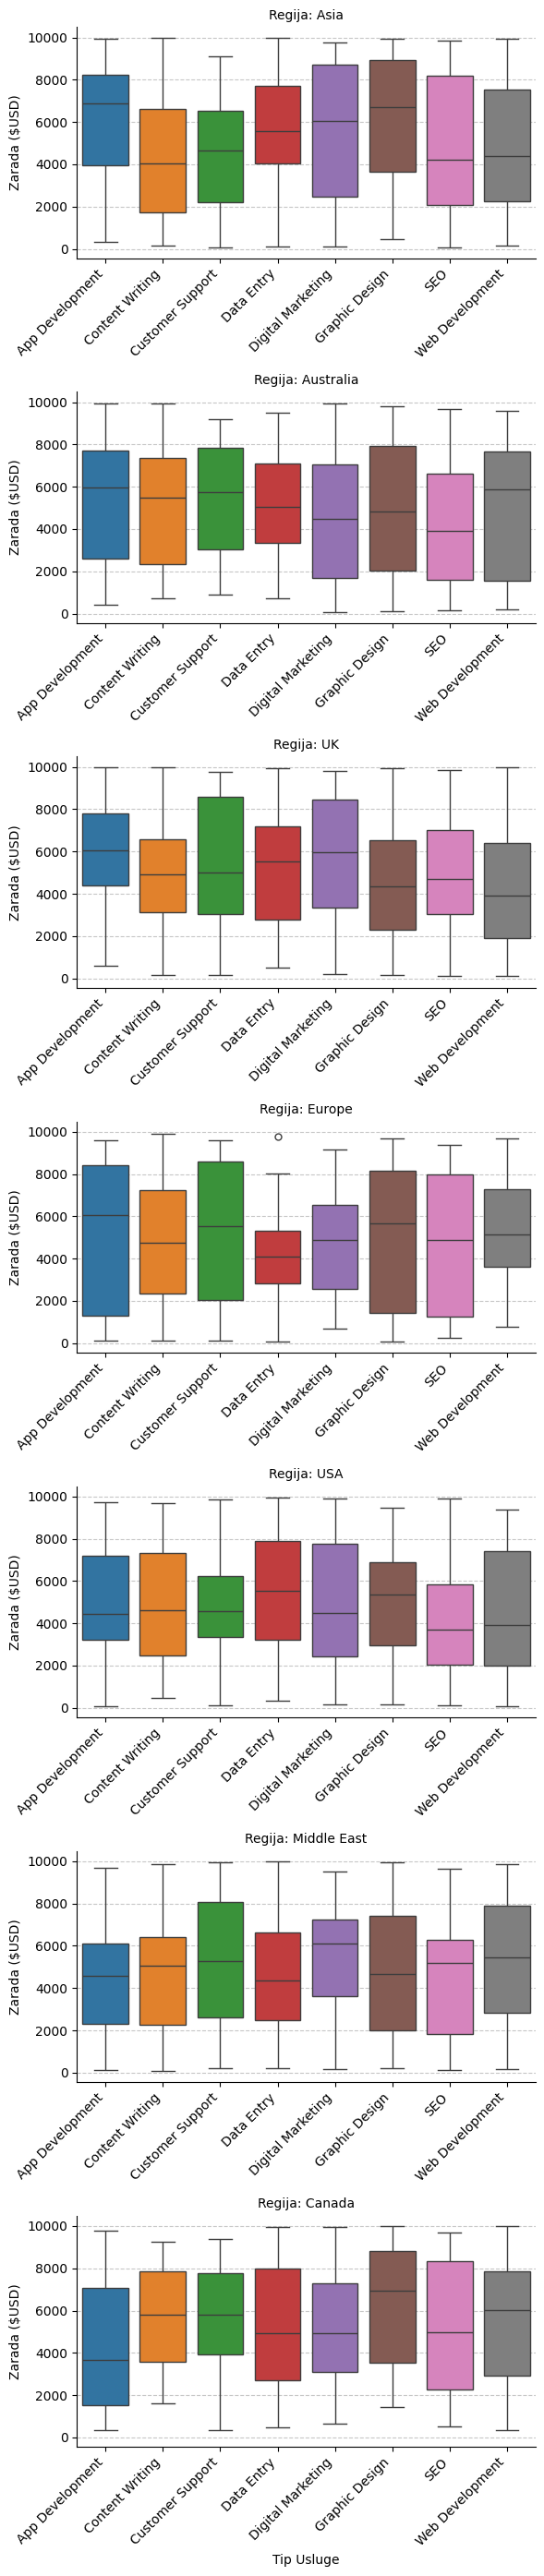

In [ ]:
order = sorted(boxplot["Tip Usluge"].unique())
boxplot["Tip Usluge"] = pd.Categorical(boxplot["Tip Usluge"], categories=order, ordered=True)
palette = sns.color_palette("tab10", n_colors=len(order))
palette_dict = dict(zip(order, palette))

g= sns.catplot(data=boxplot, x="Tip Usluge", y="Zarada ($USD)", col="Regija", kind="box",col_wrap=1,height=4,aspect=1.5,sharex=False,palette=palette_dict)
g.set_xticklabels(rotation=45,ha="right")
g.set_titles("Regija: {col_name}")

for ax in g.axes.flat:
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

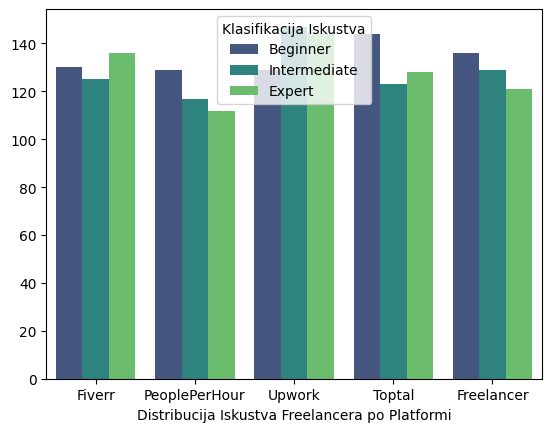

In [ ]:
sns.countplot(
    data=df,
    x='Platform',
    hue='Experience_Level',
    palette='viridis',
   )
plt.xlabel("Distribucija Iskustva Freelancera po Platformi")
plt.legend(title="Klasifikacija Iskustva")
plt.ylabel("")
plt.show()

## 3. Vjerovatnoća (Poglavlje 2),
        
Definišite i izračunajte osnovne i uslovne vjerovatnoće koristeći podatke iz dataseta.
---
### Hipoteza: Iskusniji _freelancer_-i gravitiraju ka platformi Toptal dok oni manje iskusni preferiraju Fiverr

TODO: barplot

Svako ko se zanima za rad na daljinu u IT industriji, zna da platforma Toptal važi za \"elitnu\" platformu koja prihvata samo najbolje kandidate kroz rigorozni proces intervjua koji uključuje rješavanje teških algoritamskih problema i ponaša se više kao svojevrstan _head hunter_ za velike firme nego tradicionalna stranica za oglase. S druge strane, platforma Fiverr je poznata po jednostavnosti upotrebe, satnicama od čak samo $5 (odakle dolazi i ime Fiverr) i zasićenosti tržišta.
        
Bilo bi prirodno zaključiti da su iskusniji _freelancer_-i prisutniji na ekskluzivnim platformama poput Toptal-a, a da oni koji tek ulaze u svijet _freelancing_-a preferiraju pristupačnije platforme.

No, da li se naša hipoteza zasnovana na anegdotalnim dokazima poklapa sa činjenicama o dostupnom uzorku? To možemo zaključiti samo primjenom matematičke teorije vjerovatnoće.

Prvo ćemo za svaku platformu izračunati vjerovatnoću da je freelancer koristi pod uslovom da znamo njegov nivo iskustva. Dobivene vrijednosti ćemo prikazati tablično. Za sam proračun, koristit ćemo matematičku formulu za uslovnu vjerovatnoću:

$
P(\text{Platform}|\text{Experience\textunderscore Level}) = \frac{P(\text{Platform} \cap \text{Experience\textunderscore Level})}{P(\text{Experience\textunderscore Level})}
$

In [ ]:
# Vaš kod ovdje

# Ova funkcija ispisuje uvjetnu vjerovatnoću da freelancer koristi neku platformu ako mu znamo nivo iskustva
# Funkciju je napisao GitHub Copilot na osnovu kôda kojeg sam ranije pisao za pojedinačne slučajeve i opisa funkckije koji sam dao u komentaru
def conditional_probability(df, platform, experience_level):
    """
    Izračunava uvjetnu vjerovatnoću da freelancer koristi neku platformu ako mu je poznat nivo iskustva.

    :param df: DataFrame sa podacima o freelancerima
    :param platform: Ime platforme
    :param experience_level: Nivo iskustva
    :return: Uvjetna vjerovatnoća
    """
    # izdvoji instance kod kojih polje "Experience_Level" ima vrijednost "experience_level"
    experience_level_df = df.query(f"Experience_Level == '{experience_level}'")

    # izračunaj vjerovatnoću da freelancer iz uzorka ima vrijednost "experience_level"
    p_experience = len(experience_level_df) / len(df)

    # izdvoji korisnike koji su na nivou "experience_level" a koriste "platform"
    experience_platform_df = experience_level_df.query(f"Platform == '{platform}'")

    # izračunaj vjerovatnoću da je neko i korisnik "platforme" i na nivou "experience_level"
    p_experience_platform = len(experience_platform_df) / len(df)

    # izračunaj uvjetnu vjerovatnoću
    conditional_probability = p_experience_platform / p_experience

    return conditional_probability

matrica = np.zeros((3, 5),dtype=object)
i = 0
for experience_level in {"Beginner", "Intermediate", "Expert"}:
    #print(f"Ispis za platformu '{platform}'")
    j = 0
    for platform in {"Fiverr", "Freelancer", "PeoplePerHour", "Toptal", "Upwork"}:
        probability = conditional_probability(df, platform, experience_level)
        matrica[i][j] = f"{round(probability * 100, 2)} %"
        j+=1
    i+=1
        #print(f"Uvjetna vjerovatnoća da freelancer ima nivo iskustva '{experience_level}' ako je korisnik platforme '{platform}': {conditional_probability(df, platform, experience_level)}")
    #print("")
html = f"""
<div style="margin-top: 20px;display: flex; justify-content: center;flex-direction:column;width:100%;fontweight:bold">

  {pd.DataFrame(matrica, columns=["Fiverr", "Freelancer", "PeoplePerHour", "TopTal", "Upwork"],index=["Beginner", "Intermediate", "Expert"]  )
.to_html(index=True)}
  <p style="text-align: center; font-style: bold; margin-bottom: 10px;">
    Tabela 4: Uvjetna vjerovatnoća iskustva freelancera na platformi
  </p>

</div>
"""

display(HTML(html))
#df.groupby(["Experience_Level", "Platform"]).size().unstack().plot(kind="bar", stacked=True)

,Fiverr,Freelancer,PeoplePerHour,TopTal,Upwork
Beginner,19.5 %,18.25 %,19.19 %,22.93 %,20.12 %
Intermediate,21.22 %,17.47 %,19.97 %,22.46 %,18.88 %
Expert,19.46 %,19.31 %,21.56 %,19.31 %,20.36 %


Zbog malih razlika u izračunatim vjerovatnoćama, ne možemo reći da nam tablica mnogo govori o našoj hipotezi. Čak bi se moglo reči da se sa njom donekle i kosi. Naime, vjerovatnoća da početnik koristi TopTal (0.212168) je čak veća od vjerovatnoće da ga koristi ekspert (0.194611) ili srednje iskusan freelancer (0.195008). Također se da primijetiti da je vjerovatnoća da ekspert koristi Fiverr (0.215569) veća u odnosu na vjerovatnoće da ga koristi početnik (0.191688) i srednje iskusan freelancer (0.191888).

Naša hipoteza se, dakle, potpuno obrnula. Možemo se zapitati da li su razne priče o platformama za rad na daljinu uopšte blizu stvarnosti kao i da li je ovaj uzorak zaista reprezentativan (na svijetu postoji mnogo više freelancera od 1950 u ovom uzorku). Razno filozofiranje o dobivenom setu podataka ćemo ipak ostaviti za kraj. Kako se radi o globalnim podacima, moguće ih je razvrstati po regijama. Zbog toga se možemo pitati, da li naša hipoteza ima veću "težinu" (i u smislu da je tačna i u smislu da je netačna) ako se gledaju specifične regije. Možda su neke platforme popularnije u nekim regijama pa se to odražava i na njihovu popularnost među freelancerima različitih nivoa iskustva u određenoj regiji. Možda je nedavna eksplozija neke platforme u zemljama trećeg svijeta dovela do priliva freelancera svih nivoa iskustva na istu. Možda su korisnici TopTala koncentrisani u razvijenijim regijama. Sada ćemo ponoviti sve izračune koje smo izvršili za globalne podatke, ali po regijama.

Za to ćemo opet koristiti uvjetnu vjerovatnoću, samo ćemo ovoga puta kao uvjet postaviti da se radi o nekom freelanceru koji je određenog nivoa vještine _i_ iz određene regije. Veznik "i" asocira na konjunkciju koja analogon operaciji presjeka skupova  

## 4. Diskretne distribucije (Poglavlje 3)

Izaberite diskretnu varijablu, predložite distribuciju, izračunajte parametre i vjerovatnoće.

---

Kroz ovaj dio zadaće će se uzeti u razmatranje sljedeće 4 diskretne varijable: __način plačanja (Payment_Method)__, __način poslovanja (Project_Type)__, __kategorija projekta (Job_Category)__ i __dužina trajanja projekta u danima (Job_Duration_Days)__. Sve su varijable kategorične osim "trajanja projekta u danima", koja je pobrojna.


Ispod su definisane funkcije koje će se intenzivno koristiti kroz ovaj dio zadaće, a to su:
1. funkcija za crtanje bar-plota
1. funkcija za crtanje box-plota
1. funkcija za računanje očekivane vrijednosti, varijance i standardne devijacije numeričkih podataka
1. funkcija za računanje očekivane vrijednosti, varijance i standardne devijacije kategoričnih podataka
1. funkcije za crtanje tabele

In [ ]:
# Ovdje će biti definisane funkcije koje će se često koristiti u nastavku
def nacrtaj_bar_plota(df, kolona: str, title='Diskretna distribucija vjerovatnoće načina poslovanja', xlabel='Način poslovanja', ylabel='Vjerovatnoća'):
    pm_df = df[kolona].value_counts(normalize=True).reset_index()
    pm_df.columns = [kolona, 'Broj']
    sns.barplot(data=pm_df, x=kolona, y='Broj', palette=['red']* len(pm_df), hue=kolona)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    pass

def nacrtaj_box_plota(df,kolona: str, title='Distribucija trajanja posla (boxplot)',ylabel='Trajanje posla (dani)'):
    sns.boxplot(y=df[kolona], color='red')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()
    pass

def izracunaj_ocekivanu_vrijednost__varijancu__standardnu_devijaciju(df,kolona: str,normalize=True):
    pm_df = df[kolona].value_counts(normalize=normalize).reset_index()
    pm_df.columns = [kolona, 'Probability']

    expected_value = (pm_df[kolona] * pm_df['Probability']).sum()
    variance = ((pm_df[kolona]-expected_value)**2 * pm_df['Probability']).sum()
    return expected_value, variance, np.sqrt(variance)

def kategoricki_izracunaj_ocekivanu_vrijednost__varijancu__standardnu_devijaciju(df,kolona: str,normalize=True):
    # Dodijeliti numerički kod svakoj kategoriji
    kategorije = df[kolona].value_counts().index.tolist()
    kodovi = {k: i+1 for i, k in enumerate(kategorije)}  # Početak od 1, može i od 0

    # Kreiraj tablicu vjerovatnoća
    pm_df = df[kolona].value_counts(normalize=normalize).reset_index()
    pm_df.columns = [kolona, 'Probability']

    # Dodaj kolonu s numeričkim kodovima
    pm_df['Kod'] = pm_df[kolona].map(kodovi)

    # Izračuni
    expected_value = (pm_df['Kod'] * pm_df['Probability']).sum()
    variance = ((pm_df['Kod'] - expected_value) ** 2 * pm_df['Probability']).sum()

    return expected_value, variance, np.sqrt(variance)

def ispisi_tabelu(df: pd.DataFrame,kolona:str,koliko=10,normalize=True,naziv_tabele: str='Diskretna distribucija vjerovatnoće trajanja posla',indeksiraj=False,broj_tabele=-1):
    # Broj ponavljanja
    counts = df[kolona].value_counts()
    # Vjerovatnoće
    probs = df[kolona].value_counts(normalize=normalize)

    # Kombinovanje u jedan DataFrame
    pm_df = counts.to_frame(name='Broj').join(probs.to_frame(name='Vjerovatnoća')).reset_index()
    pm_df.columns = [kolona, 'Broj', 'Vjerovatnoća']
    #pm_df = df[kolona].value_counts(normalize=normalize).reset_index()
    #pm_df.columns = [kolona, 'Broj']
    if indeksiraj:
        pm_df.insert(1, "Indeks", range(1, len(pm_df) + 1))
    html = f"""
<hr>
<div style="margin-top: 20px;display: flex; justify-content: center;flex-direction:column">

  {pm_df.head(koliko).to_html(index=False)}
  <p style="text-align: center; font-style: bold; margin-bottom: 10px;">
    Tabela {broj_tabele}: {naziv_tabele}
  </p>

</div>
<hr>
"""
    display(HTML(html))
    pass

def ispisi_tabelu_rezultata(df: pd.DataFrame,naziv_tabele: str='Diskretna distribucija vjerovatnoće trajanja posla',broj_tabele=-1):
    html = f"""
<hr>
<div style="margin-top: 20px;display: flex; justify-content: center;flex-direction:column">

  {df.head().to_html(index=False)}
  <p style="text-align: center; font-style: bold; margin-bottom: 10px;">
    Tabela {broj_tabele}: {naziv_tabele}
  </p>

</div>
<hr>
"""
    display(HTML(html))
    pass


Kategorije: Payment_Method, Project_Type, Job_Category, Platform
Brojanje:   Job_Duration_Days

### Analiza varijable način poslovanja (Project_Type)

Podatke ćemo prikazati tabelarno i preko bar-plota.
Tabelarno, da bi mogli vidjeti konkretne brojeve i vjerovatnoće za svaku vrijednost koju razmatramo, a preko bar-plota ćemo vizualno predstaviti podatke.

Pošto se radi o kategoričnim podacima, biće ih potrebno indeksirati, kako bi mogli vršiti proračune na njima.

Project_Type,Indeks,Broj,Vjerovatnoća
Fixed,1,997,0.511282
Hourly,2,953,0.488718


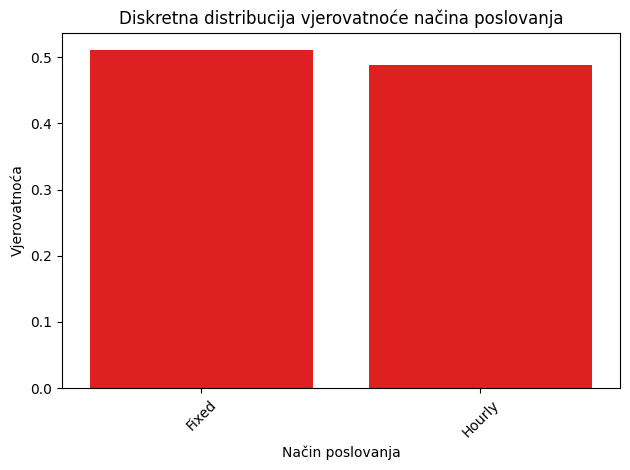

In [ ]:
ispisi_tabelu(
    df,
    kolona='Project_Type',
    naziv_tabele='Tabelarni prikaz podataka s njihovim indeksom, brojem i vjerovatnoćom',
    indeksiraj=True
)
nacrtaj_bar_plota(
    df,
    kolona="Project_Type",
    title='Diskretna distribucija vjerovatnoće načina poslovanja',
    xlabel='Način poslovanja',
    ylabel='Vjerovatnoća'
)

Sad ćemo izračunati očekivanu vrijednost i varijansu za svaku vrijednost

In [ ]:
expected_value, variance, _ = kategoricki_izracunaj_ocekivanu_vrijednost__varijancu__standardnu_devijaciju(
    df,
    kolona='Project_Type',
    normalize=True
)

ispisi_tabelu_rezultata(
    pd.DataFrame(
        data={
            "Očekivana vrijednost":[expected_value],
            "Varijansa":[variance]
            #,"Standardna devijacija":[_]
        }
    ),
    naziv_tabele='Očekivana vrijednost i varijansa za tip projekta'
)


Očekivana vrijednost,Varijansa
1.488718,0.249873


#### Zaključak

### Analiza varijable trajanje posla u danima (Job_Duration_Days)

Podatke ćemo prikazati preko box-plota, pošto je previše unikatnih varijabli za bar-plot, na kojem se vrijednosti ne bi jasno mogle očitati.

Tabelarni prikaz će isto biti izazovan za prikazati zbog količine podataka, tako da ćemo prikazati samo medijanu i kvartile s box-plota.

 tako da ćemo prikazati samo prvih 10 koji su se pojavili u datasetu.


Min,Q1,Median,Q3,Max
1,22,45,67,89


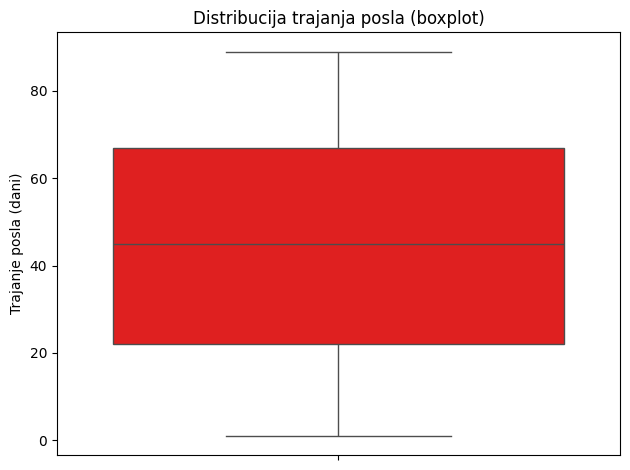

In [ ]:
ispisi_tabelu_rezultata(
    df=pd.DataFrame(
        data={
            "Min":[int(df['Job_Duration_Days'].min())],
            "Q1":[int(df['Job_Duration_Days'].quantile(.25))],
            "Median":[int(df['Job_Duration_Days'].median())],
            "Q3":[int(df['Job_Duration_Days'].quantile(.75))],
            "Max":[int(df['Job_Duration_Days'].max())]
        }
    ),
    naziv_tabele='Tabela kvartila'
)
nacrtaj_box_plota(
    df,
    kolona='Job_Duration_Days',
    title='Distribucija trajanja posla (boxplot)',
    ylabel='Trajanje posla (dani)'
)

Sad ćemo izračunati očekivanu vrijednost i varijansu

In [ ]:
expected_value, variance, _ = kategoricki_izracunaj_ocekivanu_vrijednost__varijancu__standardnu_devijaciju(
    df,
    kolona='Job_Duration_Days',
    normalize=True
)

ispisi_tabelu_rezultata(
    pd.DataFrame(
        data={
            "Očekivana vrijednost":[expected_value],
            "Varijansa":[variance]
            #,"Standardna devijacija":[_]
        }
    ),
    naziv_tabele='Očekivana vrijednost i varijansa za trajanje posla u danima'
)

Očekivana vrijednost,Varijansa
39.630769,630.045207


#### Zaključak

### Analiza varijable Payment_Method

Podatke ćemo prikazati tabelarno i preko bar-plota.
Tabelarno, da bi mogli vidjeti konkretne brojeve i vjerovatnoće za svaku vrijednost koju razmatramo, a preko bar-plota ćemo vizualno predstaviti podatke.

Pošto se radi o kategoričnim podacima, biće ih potrebno indeksirati, kako bi mogli vršiti proračune na njima.

Payment_Method,Indeks,Broj,Vjerovatnoća
Crypto,1,514,0.263590
Bank Transfer,2,494,0.253333
Mobile Banking,3,476,0.244103
PayPal,4,466,0.238974


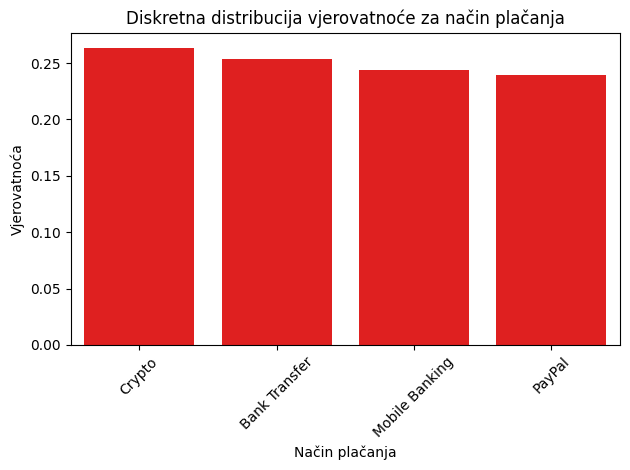

In [ ]:
ispisi_tabelu(
    df,
    kolona='Payment_Method',
    indeksiraj=True
)
nacrtaj_bar_plota(
    df,
    'Payment_Method',
    'Diskretna distribucija vjerovatnoće za način plačanja',
    'Način plačanja',
    'Vjerovatnoća'
)

Sad ćemo izračunati očekivanu vrijednost i varijansu za svaku vrijednost


In [ ]:
expected_value, variance, _ = kategoricki_izracunaj_ocekivanu_vrijednost__varijancu__standardnu_devijaciju(
    df,
    kolona='Payment_Method',
    normalize=True
)

ispisi_tabelu_rezultata(
    pd.DataFrame(
        data={
            "Očekivana vrijednost":[expected_value],
            "Varijansa":[variance],
            "Standardna devijacija":[_]
        }
    ),
    naziv_tabele="Očekivana vrijednost i varijansa za načina plaćanja"
)


Očekivana vrijednost,Varijansa,Standardna devijacija
2.458462,1.253403,1.119555


#### Zaključak


### Analiza varijable kategorije poslova (Job_Category)

Podatke ćemo prikazati tabelarno i preko bar-plota.
Tabelarno, da bi mogli vidjeti konkretne brojeve i vjerovatnoće za svaku vrijednost koju razmatramo, a preko bar-plota ćemo vizualno predstaviti podatke.

Pošto se radi o kategoričnim podacima, biće ih potrebno indeksirati, kako bi mogli vršiti proračune na njima.

Job_Category,Indeks,Broj,Vjerovatnoća
Graphic Design,1,265,0.135897
Web Development,2,256,0.131282
App Development,3,248,0.127179
Customer Support,4,244,0.125128
Data Entry,5,238,0.122051
SEO,6,237,0.121538
Digital Marketing,7,231,0.118462
Content Writing,8,231,0.118462


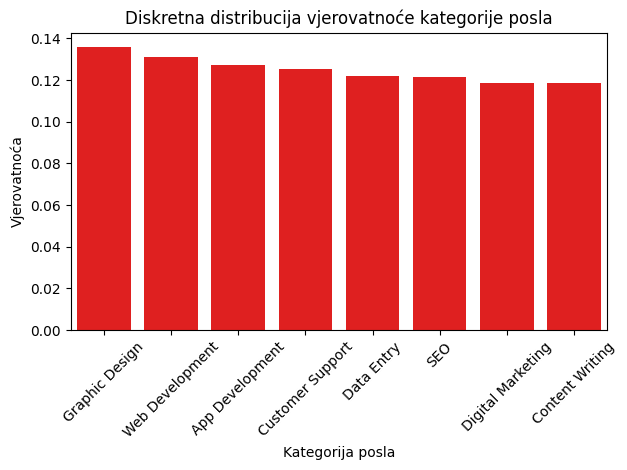

In [ ]:
ispisi_tabelu(
    df,
    kolona='Job_Category',
    naziv_tabele='Tabelarni prikaz podataka s njihovim indeksom, brojem i vjerovatnoćom',
    indeksiraj=True
)
nacrtaj_bar_plota(
    df,
    kolona="Job_Category",
    title='Diskretna distribucija vjerovatnoće kategorije posla',
    xlabel='Kategorija posla',
    ylabel='Vjerovatnoća'
)

Sad ćemo izračunati očekivanu vrijednost i varijansu za svaku vrijednost

In [ ]:
expected_value, variance, _ = kategoricki_izracunaj_ocekivanu_vrijednost__varijancu__standardnu_devijaciju(
    df,
    kolona='Job_Category',
    normalize=True
)

ispisi_tabelu_rezultata(
    pd.DataFrame(
        data={
            "Očekivana vrijednost":[expected_value],
            "Varijansa":[variance]
            #,"Standardna devijacija":[_]
        }
    ),
    naziv_tabele='Očekivana vrijednost i varijansa za kategoriju posla'
)

Očekivana vrijednost,Varijansa
4.396923,5.28758


#### Zaključak

## 5. Kontinuirane distribucije (Poglavlje 4)

##### Odaberite tri do četiri kontinualne varijable i vizualizirajte njihove distribucije.
---

Sada ćemo analizirati neke kontinualne varijable i pogledati kakve su njihove distribucije. Biramo 'Job_Success_Rate', 'Client_Rating' i 'Rehire_Rate'.

Prvo pogledajmo Job_Success_rate.

[Text(0.5, 0, '')]

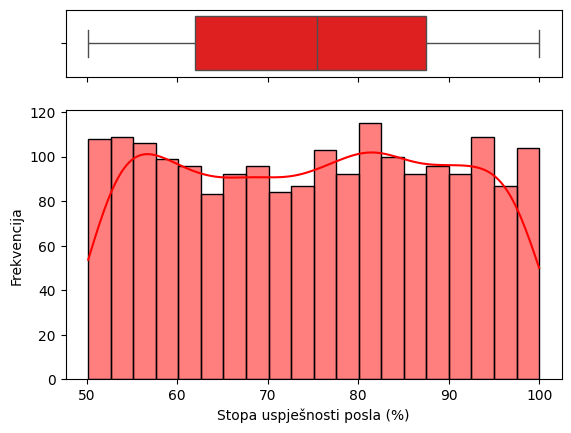

In [ ]:
import matplotlib.pyplot as plt

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 0.8)})
sns.boxplot(data=df, x="Job_Success_Rate", ax=ax_box, color='red')
plt.xlabel('Stopa uspješnosti posla (%)')
plt.ylabel('Frekvencija')
sns.histplot(data=df, x="Job_Success_Rate", kde='True', bins = 20, ax=ax_hist, color='red')
ax_box.set(xlabel='')


Ono što možemo da primjetimo iz histograma normalne distribucije i što nam krivulja gustoće prikazuje jeste da je funkcija dosta "ravna" osim pri samim vrijednostima minimuma i maksimuma kada je primjetno da naglo opada iz razloga što se u tim slučajevima vjerovatnoća pojavljivanja naglo smanjuje, dok se kod nas dešava situacija da se frekvencija freelancera sa velikom uspješnošću uopšte ne smanjuje. To nam govori da raspoloživi podaci uopšte nisu normalno distribuisani i da se radi o vrlo neuobičajenom uzorku kojeg analiziramo.

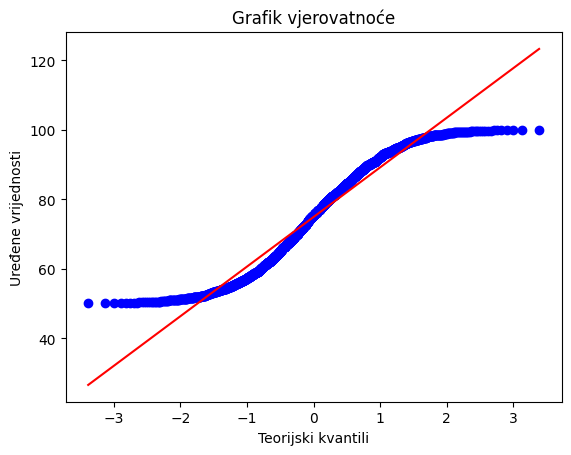

In [ ]:
import scipy.stats as stats
stats.probplot(df.Job_Success_Rate.dropna(), plot=plt)
plt.title('Grafik vjerovatnoće')
plt.ylabel('Uređene vrijednosti')
plt.xlabel('Teorijski kvantili')
plt.show()

Ovaj grafik vjerovatnoće bi trebao da bude još jedan pokazatelj distribucije analiziranih podataka i njene normalnosti. Vidljiva su velika odstupanja od prave koja predstavlja normalnu distribuciju što dodatno potvrđuje ono što smo mogli vidjeti na histogramu, a to je da radimo sa vrlo "čudnim" podacima.

In [ ]:
uspjesni = df[df['Job_Success_Rate'] >= 95]
count = len(uspjesni)
#i = count/1950 * 100
#print(i)
#round(df.describe(), 1)

Sada pogledajmo varijablu 'Client_Rating'. Analiza ove varijable će nam dati uvid u zadovoljstvo klijenata sa dobijenim proizvodom.

[Text(0.5, 0, '')]

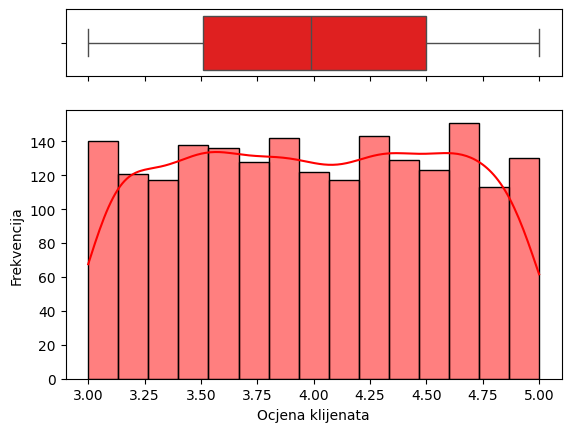

In [ ]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 0.8)})
sns.boxplot(data=df, x="Client_Rating", ax=ax_box, color='red')
plt.xlabel('Ocjena klijenata')
plt.ylabel('Frekvencija')
sns.histplot(data=df, x="Client_Rating", kde='True', bins = 15, ax=ax_hist, color='red')
ax_box.set(xlabel='')

Da se primjetiti da KDE na većini vrijednosti dosta odgovara realnom stanju, međutim, primjetno je da imamo sličnu situaciju na krajevima prostora uzorka gdje se pojavljuje veći broj slučajeva nego što se obično očekuje. Ova situacija dosta podsjeća na prethodnu sa slučajem Job_Success_Rate

Još ćemo pogledati distribuciju varijable 'Rehire_Rate'. Ona bi nam mogla pokazati koliko se klijenti odlučuju da u budućim saradnjama biraju iste freelancere.

[Text(0.5, 0, '')]

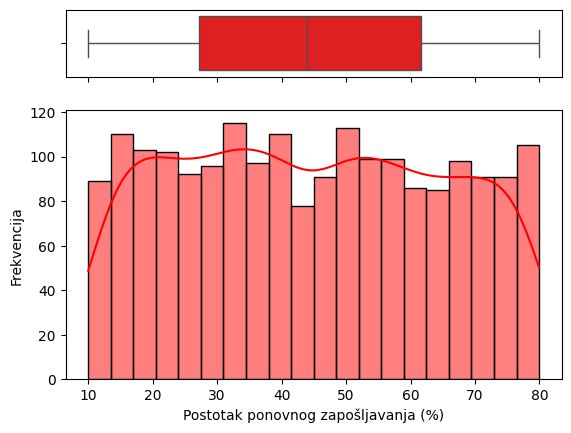

In [ ]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 0.8)})
sns.boxplot(data=df, x="Rehire_Rate", ax=ax_box, color='red')
plt.xlabel('Postotak ponovnog zapošljavanja (%)')
plt.ylabel('Frekvencija')
sns.histplot(data=df, x="Rehire_Rate", kde='True', bins = 20, ax=ax_hist, color='red')
ax_box.set(xlabel='')

Kao i u prethodna dva slučaja, vidimo isti trend. Na krajevima prostora uzorka se dešava jako puno neprirodnih događaja jer imamo puno više slučajeva freelancera koji vrlo često ili vrlo rijetko budu ponovo zaposleni od strane istog klijenta, što je nešto vrlo zanimljivo i teško za objasniti čak i ako je bilo stratifikovano prikupljanje podataka.

Sada ćemo nastaviti analizu ovih podataka na malo drugačiji način. Pogledati ćemo njihovu varijansu i očekivanu vrijednost.

In [ ]:
expected_values = df[['Job_Success_Rate', 'Client_Rating', 'Rehire_Rate']].mean()

variances = df[['Job_Success_Rate', 'Client_Rating', 'Rehire_Rate']].var()

# Prikaz rezultata
print("Očekivane vrijednosti (Mean):")
print(expected_values)
print("\nVarijanse (Variance):")
print(variances)

Očekivane vrijednosti (Mean):
Job_Success_Rate    74.951846
Client_Rating        3.995892
Rehire_Rate         44.556913
dtype: float64

Varijanse (Variance):
Job_Success_Rate    213.619724
Client_Rating         0.331748
Rehire_Rate         407.791251
dtype: float64


Ono što nam dobiveni podaci govore je nešto veoma zanimljivo. Imamo ogromnu varijabilnost kod Job_Success_Rate i Rehire_Rate, a veoma malu varijabilnost kod Client_Rating. Poredeći ovo sa očekivanim vrijednostima možemo zaključiti da klijenti imaju dosta slično mišljenje o freelancerima što vidimo po maloj varijansi. To nas dovodi do zaključka da su freelanceri u velikoj mjeri dosta dobri u ispunjavanju želja klijenata. Međutim ono što je čudno i pomalo u kontrastu sa ovim zaključkom jeste što je prisutna velika varijabilnost u efikasnosti izrade poslova i u postotku ponovnog zapošljavanja freelancera od strane istih klijenata.

Freelanceri imaju oko 75% uspješnosti u obavljanju poslova što je solidno, ali velika varijabilnost govori da bi tu mogli biti neki koji dižu prosjek. Sada kada to uporedimo sa našom distribucijom vidimo da u tome nema neke istine jer je vidljiva velika frekvencija freelancera sa nižim vrijednostima. Postavlja se pitanje, šta se dešava???

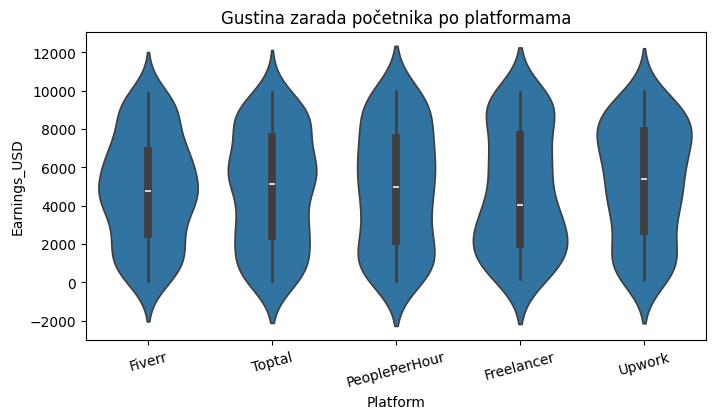

In [ ]:
#ovo premjestiti kasnije
df_pocetnici = df[df['Experience_Level'] == 'Beginner']
plt.figure(figsize=(8, 4))
sns.violinplot(data=df_pocetnici, x='Platform', y='Earnings_USD')
plt.title('Gustina zarada početnika po platformama')
plt.xticks(rotation=15)
plt.show()

## **PITANJE ?**: Da li efikasnost u poslu znači bolje prilike?

Nakon kratke analize podataka i njihove distribucije, sada je vrijeme da proanaliziramo njihove efekte u poslovnom svijetu freelancera. Zanima nas da li oni odgovorniji i vještiji freelanceri imaju bolje prilike u poslovnom svijetu, što kroz vrjednovanje njihovog posla od strane klijenata na način da će ih ponovo zaposliti ili dati veću ocjenu, što će naravno zavisiti i od kvalitete odrađenog posla, što bi također bilo vrijedno prostudirati i vidjeti da li gotov proizvod znači i dobar proizvod.

### **HIPOTEZA**: Efikasni freelanceri imaju zadovoljne, stalne klijente (Veća uspješnost u završavanju poslova znači i veću ocjenu od strane klijenata kao i veću stopu ponovnog zapošljavanja)






## 6. Zajedničke distribucije i zavisnost (Poglavlje 5)

Analizirajte odnose između varijabli koristeći vizualne i numeričke metode.

---

In [ ]:
# Vaš kod ovdje


## 7. Zaključak i refleksija

Sumirajte rezultate, diskutujte uvide i ograničenja, te predložite moguća proširenja.

---

##### experimental

In [ ]:
##from google.colab import sheets
## sheet = sheets.InteractiveSheet(df=description_categorical_data)
## ovaj faktor iznenađenja ostavljam za kasnije

In [ ]:
# Vaš kod ovdje
